In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import sys


In [12]:
img_array = cv2.imread("/Users/rahul/Desktop/python/MASK/Datasets/Face_Mask/00000_Mask.jpg")

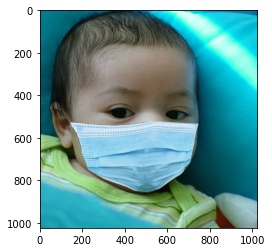

In [13]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [14]:
img_array.shape

(1024, 1024, 3)

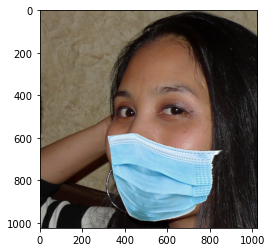

In [15]:
Datadirectory = "/Users/rahul/Desktop/python/MASK/Datasets" ## training dataset 
Classes = ["Face_Mask", "No_Mask"] ## List of classes
for category in Classes:
    path = os.path.join(Datadirectory, category) ## //
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img)) 
        #backtorgb = cv2.cvtColor(img_array, cv2. COLOR_GRAY2RGB) 
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)) 
        plt.show()
        break
    break

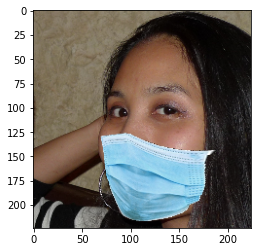

In [16]:
img_size= 224 ## ImageNet => 224 x 224

new_array= cv2.resize(img_array, (img_size, img_size)) 
plt.imshow (cv2.cvtColor (new_array, cv2.COLOR_BGR2RGB)) 
plt.show()

In [17]:
training_Data = [] ## data
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num= Classes.index(category) ## 0 1, ## Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread (os.path.join(path, img)) 
                new_array= cv2.resize(img_array, (img_size, img_size)) 
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [18]:
create_training_Data()

In [19]:
print(len(training_Data))

1878


In [20]:
import random

random.shuffle(training_Data)

In [21]:
X = [] ## data /feature
y = [] ##label

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X). reshape(-1, img_size, img_size, 3)

In [22]:
X.shape

(1878, 224, 224, 3)

In [23]:
# normalize the data
X = X/255.0; # normalization

In [24]:
y[1000]

0

In [25]:
Y=np.array(y)

In [26]:
import pickle

pickle_out= open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [27]:
pickle_in = open("X.pickle", "rb") 
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb") 
y = pickle.load(pickle_in)

### Deep Learning Training

In [28]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers

In [29]:
model = tf.keras.applications.mobilenet.MobileNet() #pre-trained model

In [30]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

## transfer Learning

In [31]:
base_input = model.layers[0].input

In [32]:
base_output = model.layers[-4].output

In [33]:
Flat_layer= layers. Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) 
final_ouput = layers.Activation('sigmoid')(final_output)

In [34]:
new_model= keras.Model(inputs = base_input, outputs=final_output)

In [35]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

## binary classification

In [36]:
new_model.compile(loss="binary_crossentropy", optimizer= "adam", metrics = ["accuracy"])

In [37]:
new_model.fit(X, Y, epochs = 5,validation_split = 0.1)

Epoch 1/5
53/53 [==============================] - 113s 2s/step - loss: 1.3925 - accuracy: 0.9006 - val_loss: 2.6848 - val_accuracy: 0.8191
Epoch 2/5
53/53 [==============================] - 113s 2s/step - loss: 1.7973 - accuracy: 0.8793 - val_loss: 6.9018 - val_accuracy: 0.5426
Epoch 3/5
53/53 [==============================] - 113s 2s/step - loss: 1.3000 - accuracy: 0.9130 - val_loss: 6.4232 - val_accuracy: 0.5745
Epoch 4/5
53/53 [==============================] - 114s 2s/step - loss: 1.4092 - accuracy: 0.9030 - val_loss: 4.1400 - val_accuracy: 0.7287
Epoch 5/5
53/53 [==============================] - 116s 2s/step - loss: 1.9001 - accuracy: 0.8728 - val_loss: 0.6564 - val_accuracy: 0.9574


In [38]:
new_model.save('my_model3.h5')


In [39]:
new_model = tf.keras.models.load_model('my_model3.h5')

## network prediction

In [40]:
frame = cv2.imread('/Users/rahul/Desktop/python/MASK/Datasets/Face_Mask/00002_Mask.jpg')

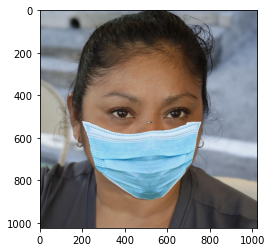

In [41]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [42]:
final_image =cv2.resize(frame, (224,224))
final_image = np.expand_dims (final_image, axis =0) ## need fourth dimension
final_image=final_image/255.0

In [43]:
Predictions = new_model.predict(final_image)

In [44]:
Predictions

array([[-28.98645]], dtype=float32)

In [45]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [48]:
import cv2 
from deepface import DeepFace 
path= "/Users/rahul/Desktop/python/MASK/Datasets/haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

#set the rectangle background white to 
rectangle_bgr = (255, 255, 255)
#make a black image 
img = np.zeros((500, 500))

#set some text

text="Some text in a box!"

#get the width and height of the text box

(text_width, text_height)= cv2.getTextSize(text, font, fontScale=font_scale, thickness = 1)[0]

#set the text stort position

text_offset_x=10

text_offset_y = img.shape[0] - 25

#make the coords of the box with a smatt padding of two pixels

box_coords =((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2)) 
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED) 
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap =cv2.VideoCapture(1)
# Check if the webcam is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    #eye_cascade cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier (cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess =  faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey + eh, ex:ex + ew]
                final_image = cv2.resize(face_roi, (224, 224))
                final_image = np.expand_dims (final_image, axis =0) ## need fourth dimension
                final_image=final_image/255.0
                font = cv2.FONT_HERSHEY_SIMPLEX
                Predictions = new_model.predict (final_image)
                font_scale = 1.5
                font = cv2.FONT_HERSHEY_PLAIN
                if (Predictions>0):
                    status = "No Mask"

                    x1, yl, w1, h1 = 0,0,175,75
                    # Draw black background rectangle
                    cv2.rectangle(frame, (x1, x1), (x1+ wl, y1+ h1), (0,0,0), -1)
                    # Add text
                    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    cv2.putText (frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
                else:
                    status = "Face Mask"
                    x1, y1, w1, h1 = 0,0,175,75
        # Draw black background rectangle
                    cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
                    cv2.putText (frame, status, (x1+ int(w1/10), y1+ int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
                    cv2.putText(frame, status, (100, 150), font, 3, (0, 255,0), 2, cv2.LINE_4) 
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255,0))

        #gray = cv2.cutcolor (frame, cv2.COLOR_BGR2GRAY) 
        #print (faceCascade. empty()) 
        #faces=faceCascade.detectMultiscale (gray, 1.1,4)
        # Draw a rectangle around the faces
        #for(x, y, w, h) in faces:
        #cv2.rectangle(frame, (x, y), (x+w, y+h), (8, 255, 0), 2)
        
        cv2.imshow('Face Mask Detection Tutorial', frame)
        if cv2.waitKey(2) & 0xFF == ord( 'q'):
            break

cap.release() 
cv2.destroyAllWindows()

Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not d

KeyboardInterrupt: 